### Import all relevant dependencies

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from pathlib import Path

In [2]:
import_path = ".." / Path("data") / "stats" / "2025-11-19_BZ1508_m282_V2_023C_TP.csv"

# Import csv to dataframe
data = pd.read_csv(import_path)

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'serif'

In [3]:
op_col = "OperationPoint [-]"
op_vals = {
    r'$135\mathrm{~A}$': 2,
    r'$294\mathrm{~A}$': 12,
    r'$420\mathrm{~A}$': 15,
    r'$504\mathrm{~A}$': 16
}

# u_col = "U.S [V]"
u_col = "U.S.AveCell [V]"
# uc_cols = ["U0"+str(i)+" [V]" for i in range(1,10)]
# uc_cols.extend(["U"+str(i)+" [V]" for i in range(10,24)])
uc_cols = ["U"+str(i)+" [V]" for i in range(17,24)]

# uc_cols = ["cell_voltage_00"+str(i) for i in range(1,10)]
# uc_cols.extend(["cell_voltage_0"+str(i) for i in range(10,23)])

i_col = "I.S.set [A]"
oh_col = "OpHrs [h]"



In [4]:
def filter_shutdown(df, u_col=u_col, op=1):
    """
    Filter for values from the DataFrame which were measured after a shutdown to remove reversible degradation.
    """
    # For every row, calculate the difference between the last u_val and the current u_val
    df_diff = df[u_col].diff().reset_index(drop=True)

    # Remove values below 0
    df_diff = df_diff[df_diff > 0]

    # Remove extraordinary high outliers
    df_diff = df_diff[df_diff < df_diff.quantile(0.99)]

    # Remove small differences to detect high voltage gains after shutdown
    df_diff = df_diff[df_diff > df_diff.mean()]

    # df_diff.plot()

    return df.iloc[df_diff.index]

In [5]:
def filter_shutdown(df, u_col=u_col, op_col=op_col, op=1):
    """
    Filter for values from the DataFrame which were measured after a shutdown to remove reversible degradation.
    """
    op_idx = df[df[op_col] == 1].index
    dif_idx = df[oh_col].iloc[op_idx].diff()>1
    dif_idx = dif_idx[dif_idx].index

    sd_idx = []
    for i in dif_idx:
        sd_idx.extend(range(i,op_idx[op_idx>i][0]))

    return df.iloc[sd_idx]

filter_shutdown(data)

,Source,Steady state start row,TP start row,TP stop row,TP start sec,TP stop sec,TP start DateTime,TP stop DateTime,Trigger value at TP start,Trigger value at TP stop,...,U14 [V],U15 [V],U16 [V],U17 [V],U18 [V],U19 [V],U20 [V],U21 [V],U22 [V],U23 [V]
57,ECS_TST40.BZ1508_m282_V2_023C,10362,15217,15247,1761037897,1761037927,10/21/2025 9:11,10/21/2025 9:12,1,1,...,0.835952,0.835788,0.835093,0.799857,0.804585,0.799823,0.808655,0.806911,0.801270,0.804891
58,ECS_TST40.BZ1508_m282_V2_023C,15247,15423,15453,1761038103,1761038133,10/21/2025 9:15,10/21/2025 9:15,2,2,...,0.743702,0.745067,0.743904,0.716329,0.723050,0.719881,0.709117,0.728783,0.723258,0.724542
59,ECS_TST40.BZ1508_m282_V2_023C,15453,15630,15660,1761039537,1761039567,10/21/2025 9:38,10/21/2025 9:39,12,12,...,0.696992,0.696037,0.695730,0.665943,0.675389,0.672782,0.639370,0.684930,0.679001,0.679917
60,ECS_TST40.BZ1508_m282_V2_023C,15660,15837,15867,1761040133,1761040163,10/21/2025 9:48,10/21/2025 9:49,15,15,...,0.658002,0.656690,0.655780,0.624438,0.635274,0.632559,0.572362,0.648069,0.641699,0.644736
61,ECS_TST40.BZ1508_m282_V2_023C,15867,16047,16077,1761040343,1761040373,10/21/2025 9:52,10/21/2025 9:52,16,16,...,0.628322,0.626763,0.625490,0.592072,0.604232,0.601922,0.516478,0.620230,0.613845,0.619489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,ECS_TST40.BZ1508_m282_V2_023C,1001092,1005922,1005952,1763497946,1763497976,11/18/2025 20:32,11/18/2025 20:32,1,1,...,0.834666,0.834145,0.832773,0.799045,0.803732,0.799055,0.807992,0.806007,0.800733,0.804247
4608,ECS_TST40.BZ1508_m282_V2_023C,1005952,1006128,1006158,1763498152,1763498182,11/18/2025 20:35,11/18/2025 20:36,2,2,...,0.745487,0.745939,0.743228,0.714571,0.721919,0.719312,0.706519,0.727972,0.722320,0.723505
4609,ECS_TST40.BZ1508_m282_V2_023C,1006158,1006335,1006365,1763499586,1763499616,11/18/2025 20:59,11/18/2025 21:00,12,12,...,0.702566,0.699656,0.697248,0.663956,0.673139,0.672769,0.634588,0.684502,0.678502,0.678682
4610,ECS_TST40.BZ1508_m282_V2_023C,1006365,1006543,1006573,1763500182,1763500212,11/18/2025 21:09,11/18/2025 21:10,15,15,...,0.667062,0.662947,0.659149,0.622163,0.632316,0.633324,0.564458,0.648085,0.641247,0.643250


#### Exclude exchanged MEAs 1-16

In [6]:
data[u_col] = data[uc_cols].mean(axis=1)

#### Filter voltage measurements after shutdown to exclude reversible degradation

In [7]:
fltr_dfs = {}

for k in op_vals.keys():
    df_fltr = filter_shutdown(data)
    df_fltr = df_fltr[df_fltr[op_col] == op_vals[k]]
    fltr_dfs[k] = df_fltr

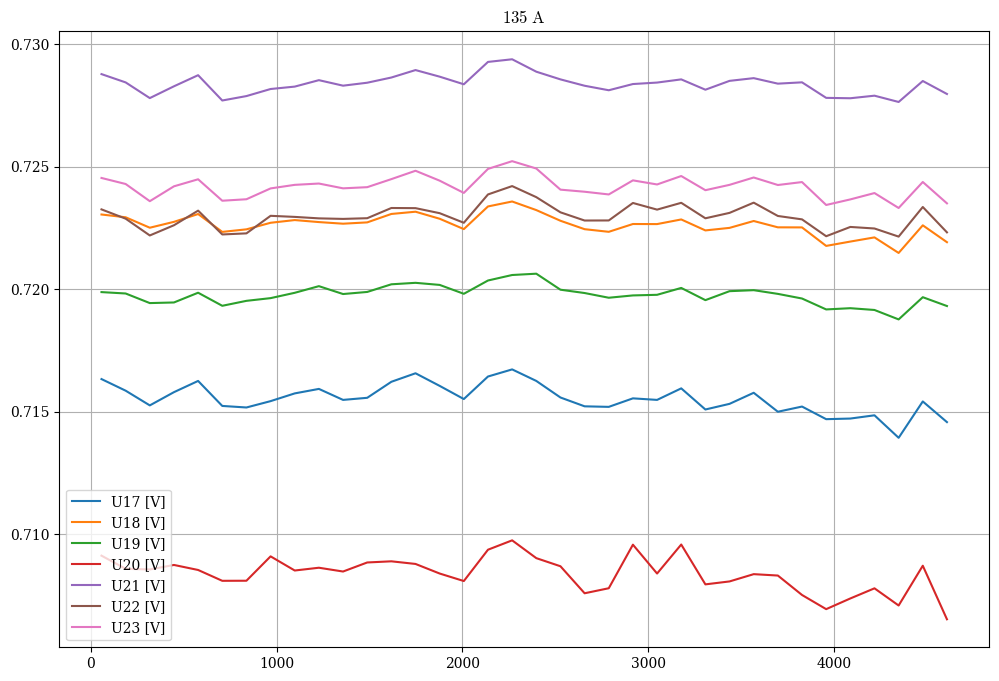

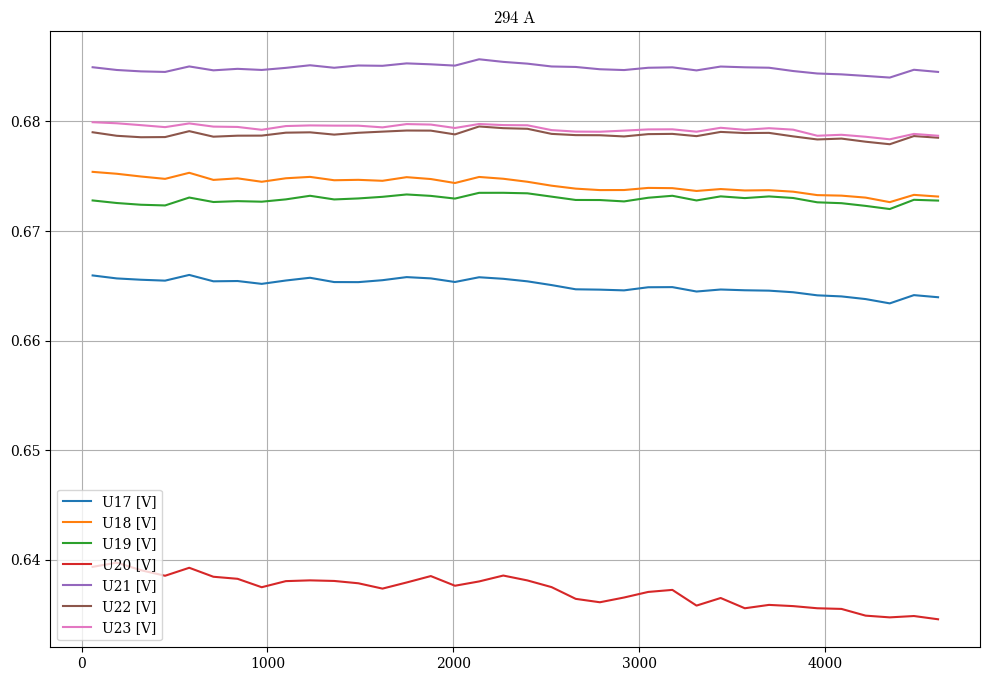

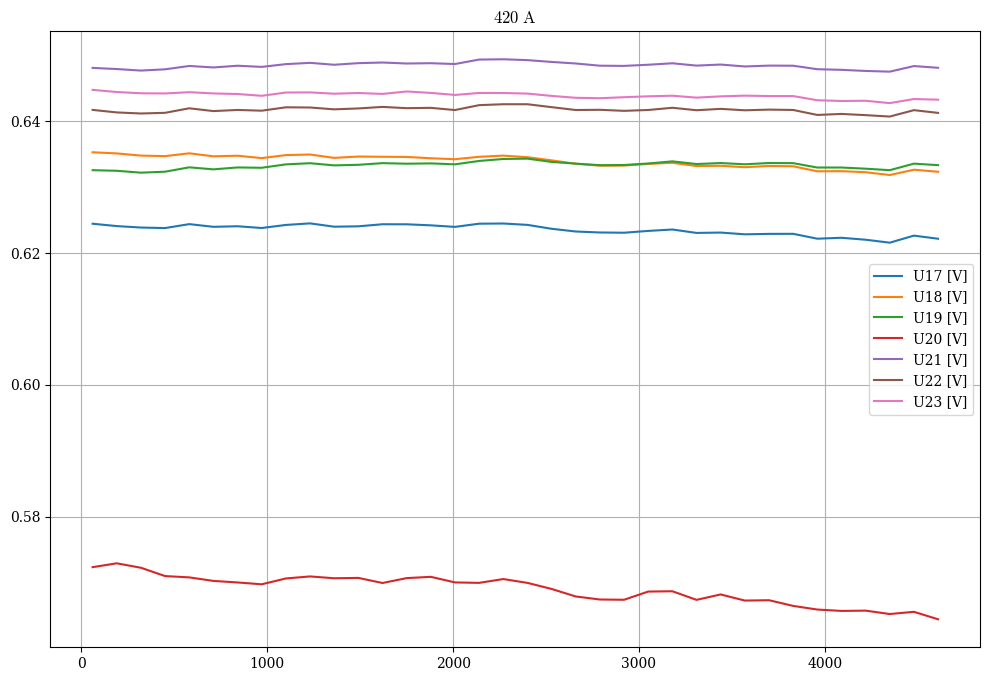

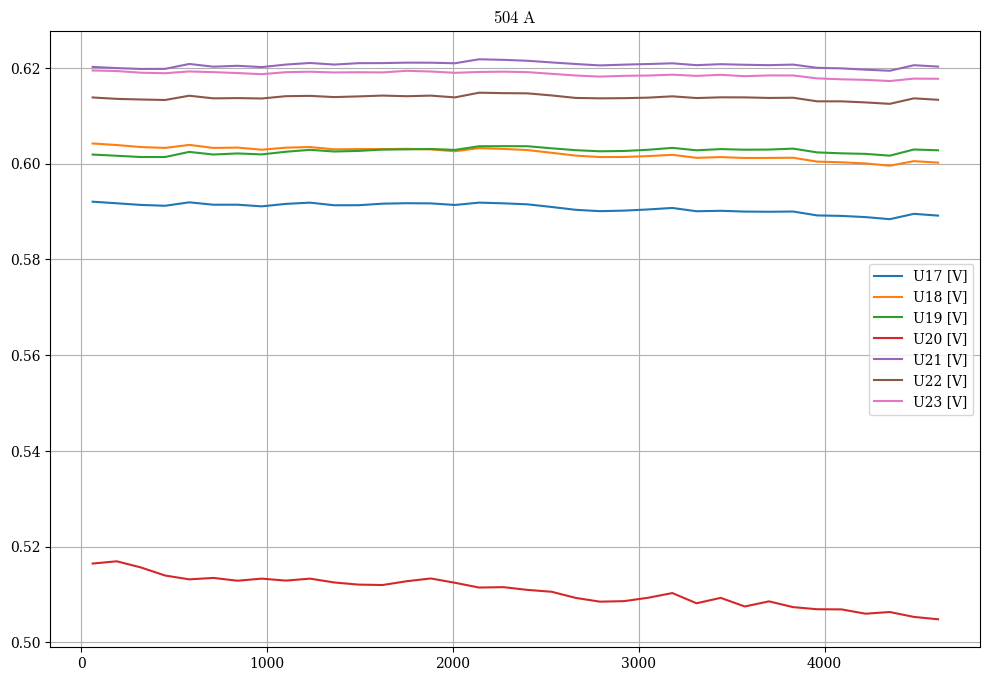

In [8]:
# For every Dataframe in fltr_dfs, plot u_col in one figure
for k in fltr_dfs.keys():
    plt.figure(figsize=(12,8))
    plt.plot(fltr_dfs[k][uc_cols[:17]], label=uc_cols[:17])
    # plt.xlim(fltr_dfs[k][oh_col].min(), fltr_dfs[k][oh_col].max())
    plt.grid()
    plt.title(k)
    plt.legend()
    plt.show()

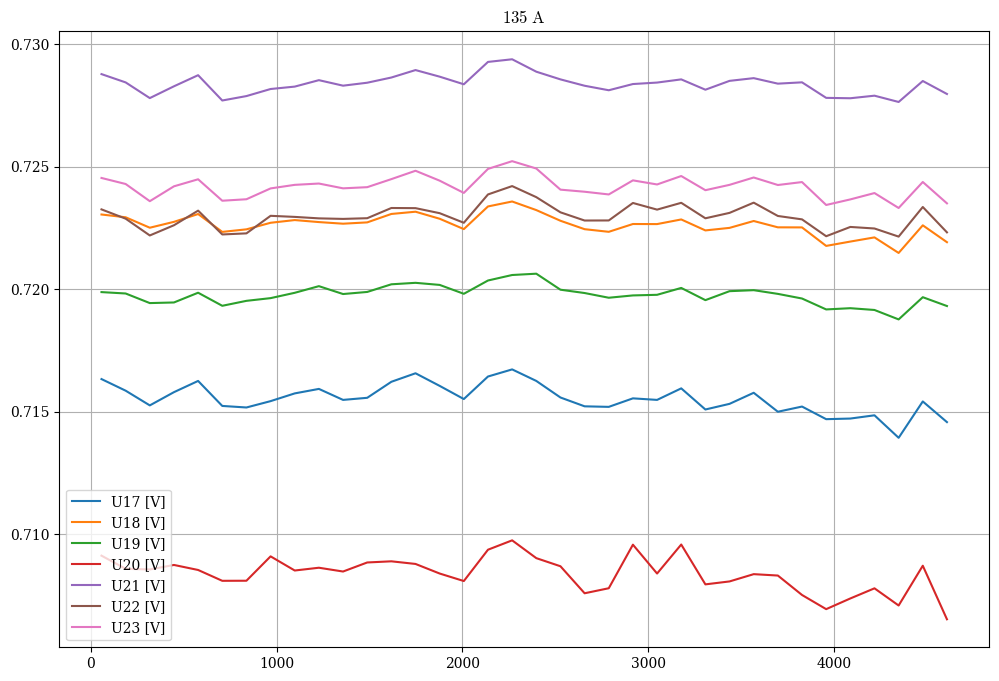

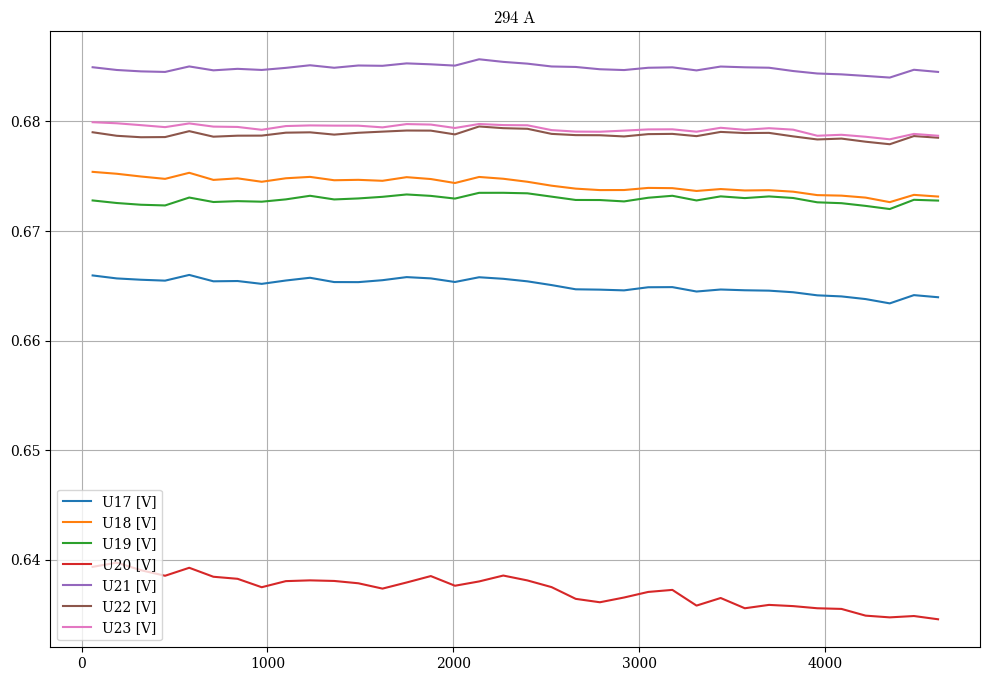

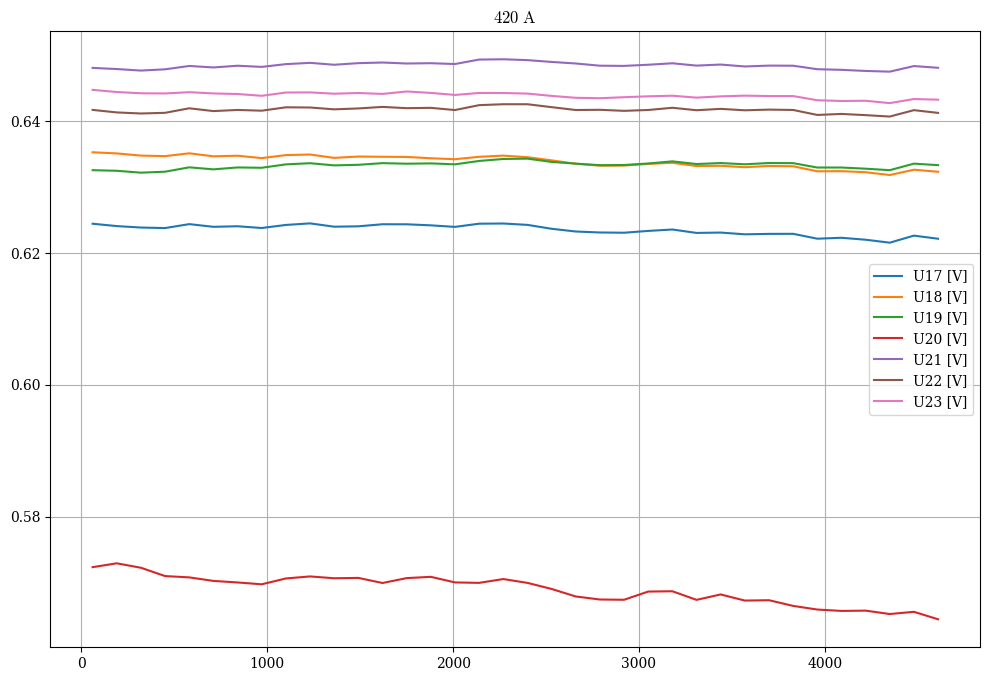

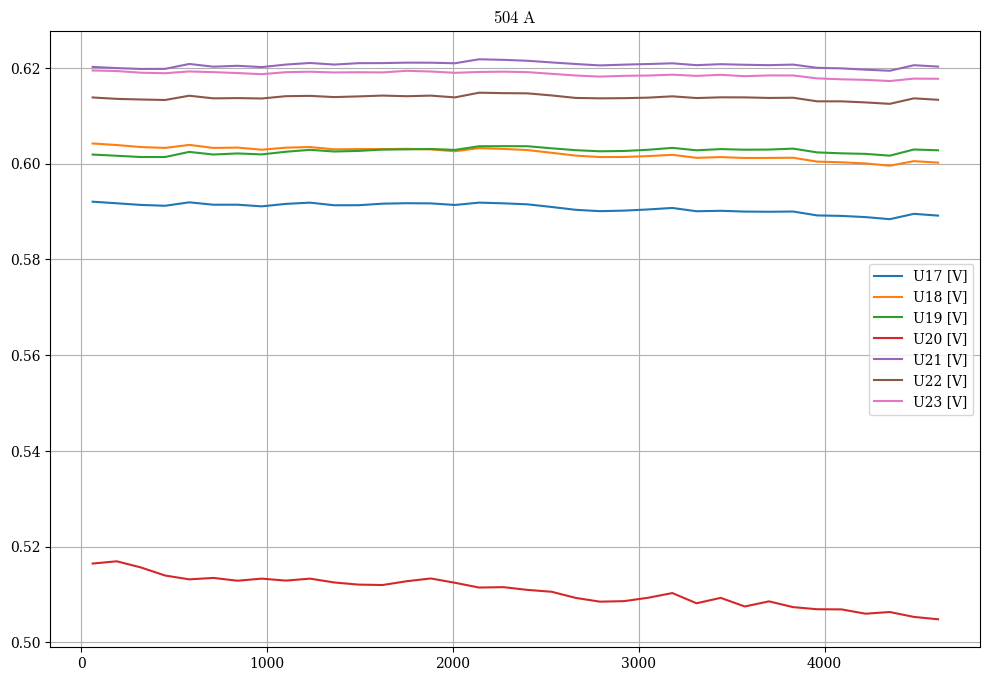

In [9]:
# For every Dataframe in fltr_dfs, plot u_col in one figure
for k in fltr_dfs.keys():
    plt.figure(figsize=(12,8))
    plt.plot(fltr_dfs[k][uc_cols], label=uc_cols)
    # plt.xlim(fltr_dfs[k][oh_col].min(), fltr_dfs[k][oh_col].max())
    plt.grid()
    plt.title(k)
    plt.legend()
    plt.show()

#### Remove irreversible degradation left from measurements

In [10]:
def remove_trend(df, u_col=u_col):
    """
    Remove linear trend from the u_col in the DataFrame.
    """
    # Calculate linear trend
    reg = stats.linregress(df[oh_col], df[u_col])
    reg_vals = reg.slope*df[oh_col] + reg.intercept

    return df[u_col] - reg_vals

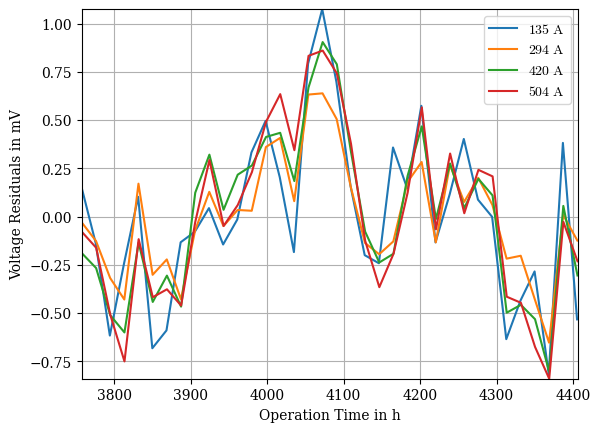

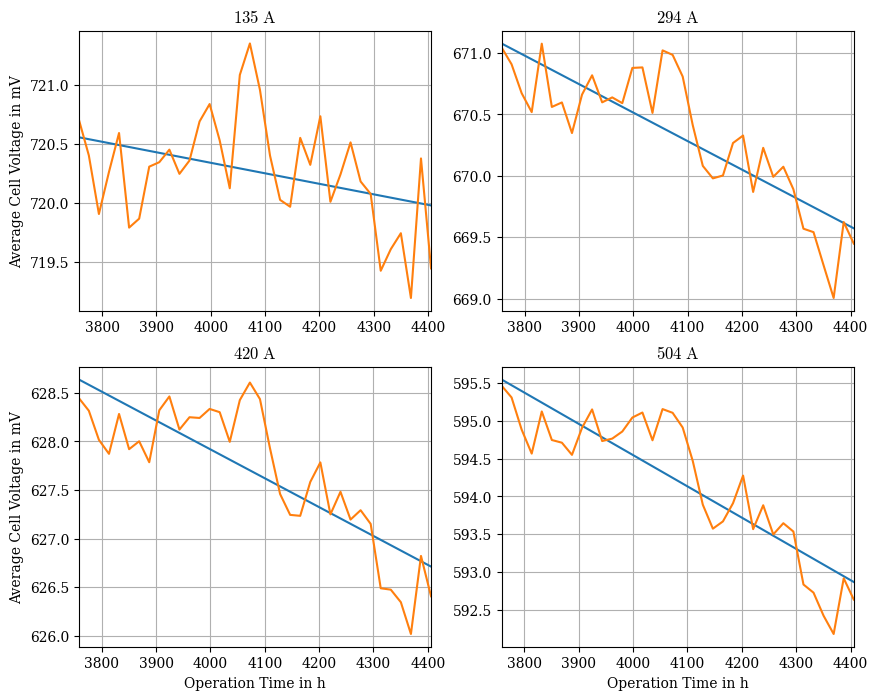

In [11]:
res_col = u_col + '.res'
trend_col = u_col + '.deg'
x_label = r'Operation Time in h'

for k in fltr_dfs.keys():
    fltr = remove_trend(fltr_dfs[k])
    fltr_dfs[k][trend_col] = fltr_dfs[k][u_col] - fltr
    fltr_dfs[k][res_col] = fltr
    plt.plot(fltr_dfs[k][oh_col], fltr_dfs[k][res_col]*1000, label=k)
    plt.xlim()

plt.legend()
plt.xlabel(x_label)
plt.ylabel(r'Voltage Residuals in mV')
plt.autoscale(enable=True, axis='both', tight=True)
plt.grid()
# plt.savefig('residuals.png')
plt.show()

fig,axes = plt.subplots(2,2, figsize=(10,8))
for i, k in enumerate(fltr_dfs.keys()):
    ax = axes.flatten()[i]
    ax.plot(fltr_dfs[k][oh_col], fltr_dfs[k][trend_col]*1000, label=k)
    ax.plot(fltr_dfs[k][oh_col], fltr_dfs[k][u_col]*1000, label=k)
    # limit ax x-axis to min max values
    xmin = fltr_dfs[k][oh_col].min()
    xmax = fltr_dfs[k][oh_col].max()
    ax.set_xlim(xmin, xmax)
    ax.set_title(k)
    ax.grid()
    if i % 2 == 0:
        ax.set_ylabel(r'Average Cell Voltage in mV')

    if i > 1:
        ax.set_xlabel(x_label)

# plt.savefig('trends.png')
plt.show()

#### Calculate sigma over all current steps

In [12]:
# Calculate mean and standard deviation
sigma_dict={k: fltr_dfs[k][res_col].std() for k in fltr_dfs.keys()}

print(np.mean(list(sigma_dict.values())))

0.0003954904154996788


In [13]:
residuals = []

for v in fltr_dfs.values():
    residuals.extend(v[res_col].to_list())

residuals = np.array(residuals) * 1000

Anzahl ursprünglicher Datenpunkte: 144
Minimaler Wert: -0.840638
Maximaler Wert: 1.074787

OUTLIER-ANALYSE: SYSTEMATISCHE ENTFERNUNG VON RANDWERTEN
Entfernung:  0% (  0 Werte) | Verbleibend: 144 | p-Wert: 0.596178 | Normal: JA
Entfernung:  1% (  2 Werte) | Verbleibend: 142 | p-Wert: 0.450745 | Normal: JA
Entfernung:  2% (  4 Werte) | Verbleibend: 140 | p-Wert: 0.419317 | Normal: JA
Entfernung:  3% (  8 Werte) | Verbleibend: 136 | p-Wert: 0.217193 | Normal: JA
Entfernung:  4% ( 10 Werte) | Verbleibend: 134 | p-Wert: 0.257103 | Normal: JA
Entfernung:  5% ( 14 Werte) | Verbleibend: 130 | p-Wert: 0.164271 | Normal: JA
Entfernung:  6% ( 16 Werte) | Verbleibend: 128 | p-Wert: 0.139974 | Normal: JA
Entfernung:  7% ( 20 Werte) | Verbleibend: 124 | p-Wert: 0.115562 | Normal: JA
Entfernung:  4% ( 10 Werte) | Verbleibend: 134 | p-Wert: 0.257103 | Normal: JA
Entfernung:  9% ( 24 Werte) | Verbleibend: 120 | p-Wert: 0.055920 | Normal: JA
Entfernung: 10% ( 28 Werte) | Verbleibend: 116 | p-Wert: 0.032

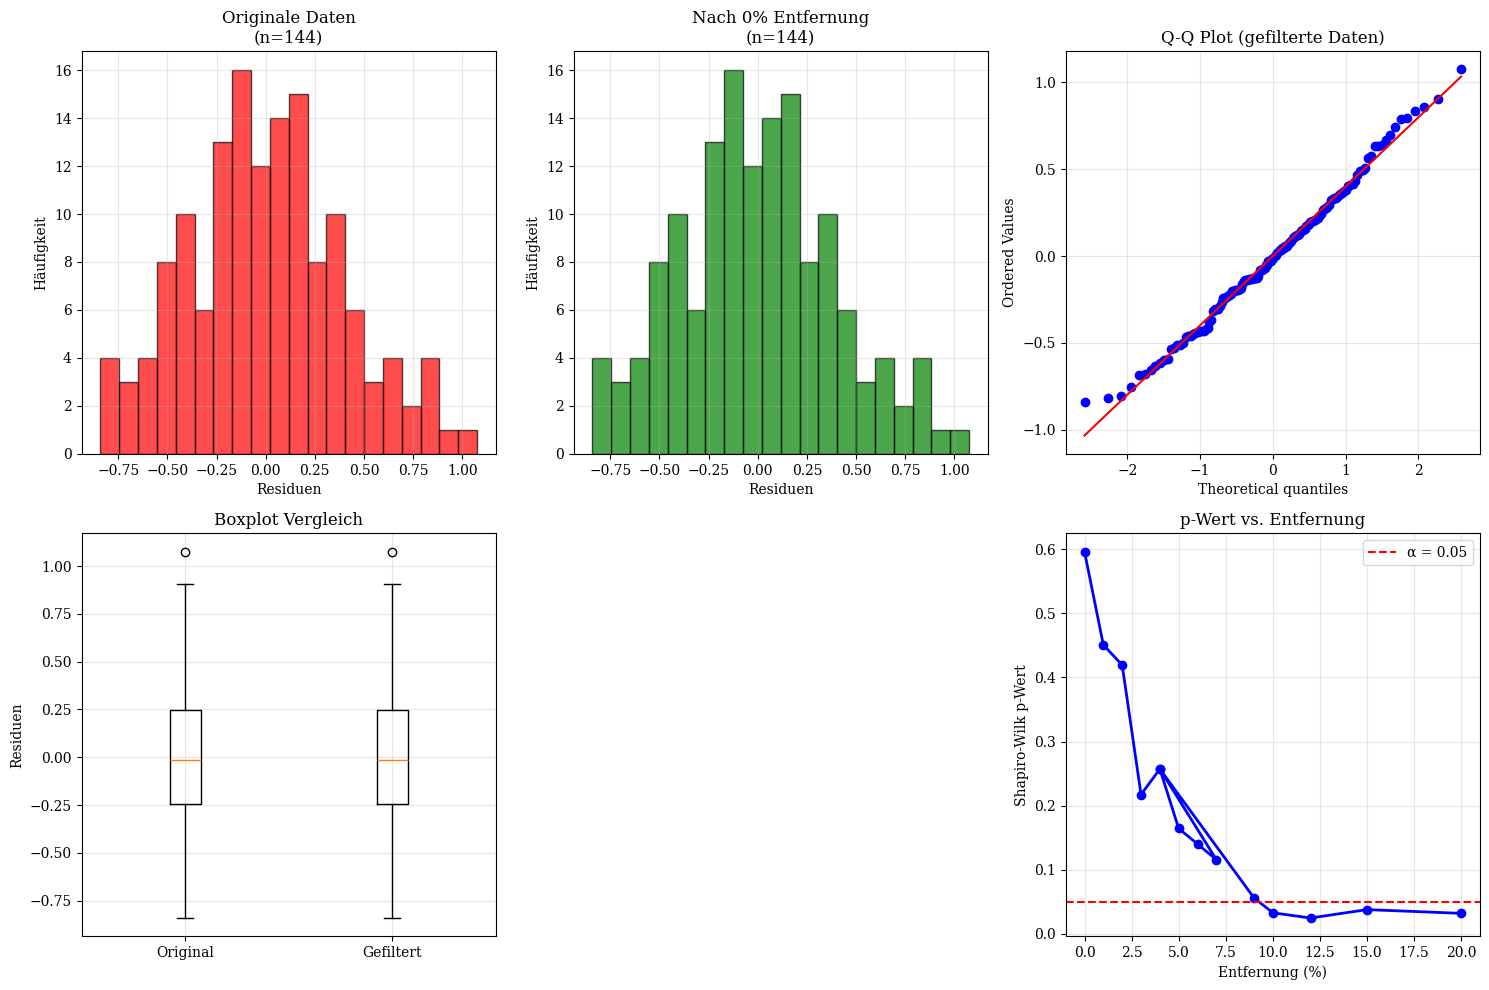


DETAILLIERTE ERGEBNISSE
Entf.% Entf.Anz Verbleib Min          Max          p-Wert       Normal
--------------------------------------------------------------------------------
0    0    144  -0.840638    1.074787     0.596178     JA  
1    2    142  -0.816791    0.904053     0.450745     JA  
2    4    140  -0.804199    0.860018     0.419317     JA  
3    8    136  -0.682742    0.791868     0.217193     JA  
4    10   134  -0.675969    0.788869     0.257103     JA  
5    14   130  -0.635571    0.697824     0.164271     JA  
6    16   128  -0.617062    0.668420     0.139974     JA  
7    20   124  -0.590307    0.634195     0.115562     JA  
4    10   134  -0.675969    0.788869     0.257103     JA  
9    24   120  -0.531984    0.573585     0.055920     JA  
10   28   116  -0.509761    0.504761     0.032657     NEIN
12   34   110  -0.461495    0.467127     0.024498     NEIN
15   42   102  -0.436230    0.401936     0.037606     NEIN
20   56   88   -0.366174    0.331853     0.031791     NE

In [14]:
try:

    print(f"Anzahl ursprünglicher Datenpunkte: {len(residuals)}")
    print(f"Minimaler Wert: {residuals.min():.6f}")
    print(f"Maximaler Wert: {residuals.max():.6f}")

    # Sortiere die Daten
    sorted_residuals = np.sort(residuals)

    print("\n" + "="*80)
    print("OUTLIER-ANALYSE: SYSTEMATISCHE ENTFERNUNG VON RANDWERTEN")
    print("="*80)

    # Teste verschiedene Prozentwerte der Entfernung
    removal_percentages = [0, 1, 2, 3, 4, 5, 6, 7, 4, 9, 10, 12, 15, 20]

    results = []

    for pct in removal_percentages:
        if pct == 0:
            # Keine Entfernung
            filtered_residuals = sorted_residuals
            removed_count = 0
        else:
            # Entferne pct% von beiden Enden
            n_remove = int(len(sorted_residuals) * pct / 100)
            if n_remove > 0:
                # Entferne n_remove Werte von beiden Enden
                filtered_residuals = sorted_residuals[n_remove:-n_remove] if n_remove < len(sorted_residuals)//2 else sorted_residuals
                removed_count = len(sorted_residuals) - len(filtered_residuals)
            else:
                filtered_residuals = sorted_residuals
                removed_count = 0

        if len(filtered_residuals) < 3:  # Mindestens 3 Werte für Test
            continue

        # Shapiro-Wilk Test
        try:
            statistic, p_value = stats.shapiro(filtered_residuals)

            results.append({
                'removal_pct': pct,
                'removed_count': removed_count,
                'remaining_count': len(filtered_residuals),
                'min_val': filtered_residuals.min(),
                'max_val': filtered_residuals.max(),
                'shapiro_stat': statistic,
                'shapiro_p': p_value,
                'is_normal': p_value > 0.05
            })

            print(f"Entfernung: {pct:2d}% ({removed_count:3d} Werte) | "
                  f"Verbleibend: {len(filtered_residuals):3d} | "
                  f"p-Wert: {p_value:.6f} | "
                  f"Normal: {'JA' if p_value > 0.05 else 'NEIN'}")

        except Exception as e:
            print(f"Fehler bei {pct}% Entfernung: {e}")
            continue

    # Finde den ersten Punkt, wo Normalverteilung erreicht wird
    normal_results = [r for r in results if r['is_normal']]

    if normal_results:
        first_normal = min(normal_results, key=lambda x: x['removal_pct'])
        print(f"\n" + "="*80)
        print("ERSTE NORMALVERTEILUNG ERREICHT")
        print("="*80)
        print(f"Bei {first_normal['removal_pct']}% Entfernung ({first_normal['removed_count']} Werte)")
        print(f"Verbleibende Werte: {first_normal['remaining_count']}")
        print(f"Neuer Wertebereich: {first_normal['min_val']:.6f} bis {first_normal['max_val']:.6f}")
        print(f"Shapiro-Wilk p-Wert: {first_normal['shapiro_p']:.6f}")

        # Erstelle Visualisierung für diesen Punkt
        plt.figure(figsize=(15, 10))

        # Originale Daten
        plt.subplot(2, 3, 1)
        plt.hist(residuals, bins=20, alpha=0.7, color='red', edgecolor='black')
        plt.title(f'Originale Daten\n(n={len(residuals)})')
        plt.xlabel('Residuen')
        plt.ylabel('Häufigkeit')
        plt.grid(True, alpha=0.3)

        # Gefilterte Daten
        filtered_for_plot = sorted_residuals[first_normal['removed_count']//2:-first_normal['removed_count']//2] if first_normal['removed_count'] > 0 else sorted_residuals
        plt.subplot(2, 3, 2)
        plt.hist(filtered_for_plot, bins=20, alpha=0.7, color='green', edgecolor='black')
        plt.title(f'Nach {first_normal["removal_pct"]}% Entfernung\n(n={len(filtered_for_plot)})')
        plt.xlabel('Residuen')
        plt.ylabel('Häufigkeit')
        plt.grid(True, alpha=0.3)

        # Q-Q Plot der gefilterten Daten
        plt.subplot(2, 3, 3)
        stats.probplot(filtered_for_plot, dist="norm", plot=plt)
        plt.title('Q-Q Plot (gefilterte Daten)')
        plt.grid(True, alpha=0.3)

        # Boxplot Vergleich
        plt.subplot(2, 3, 4)
        plt.boxplot([residuals, filtered_for_plot], tick_labels=['Original', 'Gefiltert'])
        plt.title('Boxplot Vergleich')
        plt.ylabel('Residuen')
        plt.grid(True, alpha=0.3)

        # Entfernte Werte
        if first_normal['removed_count'] > 0:
            removed_low = sorted_residuals[:first_normal['removed_count']//2]
            removed_high = sorted_residuals[-first_normal['removed_count']//2:]
            removed_all = np.concatenate([removed_low, removed_high])

            plt.subplot(2, 3, 5)
            plt.hist(removed_all, bins=10, alpha=0.7, color='orange', edgecolor='black')
            plt.title(f'Entfernte Werte\n(n={len(removed_all)})')
            plt.xlabel('Residuen')
            plt.ylabel('Häufigkeit')
            plt.grid(True, alpha=0.3)

        # p-Werte über Entfernung
        plt.subplot(2, 3, 6)
        pcts = [r['removal_pct'] for r in results]
        p_vals = [r['shapiro_p'] for r in results]
        plt.plot(pcts, p_vals, 'bo-', linewidth=2, markersize=6)
        plt.axhline(y=0.05, color='r', linestyle='--', label='α = 0.05')
        plt.xlabel('Entfernung (%)')
        plt.ylabel('Shapiro-Wilk p-Wert')
        plt.title('p-Wert vs. Entfernung')
        plt.grid(True, alpha=0.3)
        plt.legend()

        plt.tight_layout()
        plt.show()

    else:
        print("\n" + "="*80)
        print("KEINE NORMALVERTEILUNG ERREICHT")
        print("="*80)
        print("Auch nach Entfernung von 20% der Ränder wurde keine Normalverteilung erreicht.")
        print("Möglicherweise ist eine andere Transformation erforderlich.")

    # Detaillierte Tabelle aller Ergebnisse
    print(f"\n" + "="*80)
    print("DETAILLIERTE ERGEBNISSE")
    print("="*80)
    print(f"{'Entf.%':<4} {'Entf.Anz':<4} {'Verbleib':<4} {'Min':<12} {'Max':<12} {'p-Wert':<12} {'Normal':<4}")
    print("-" * 80)

    for r in results:
        print(f"{r['removal_pct']:<4} {r['removed_count']:<4} {r['remaining_count']:<4} "
              f"{r['min_val']:<12.6f} {r['max_val']:<12.6f} {r['shapiro_p']:<12.6f} "
              f"{'JA' if r['is_normal'] else 'NEIN':<4}")

    # Statistiken der gefilterten Daten
    mean_filtered = sorted_residuals.mean()
    std_filtered = sorted_residuals.std()


except Exception as e:
    print(f"Fehler beim Laden der CSV-Datei: {e}")

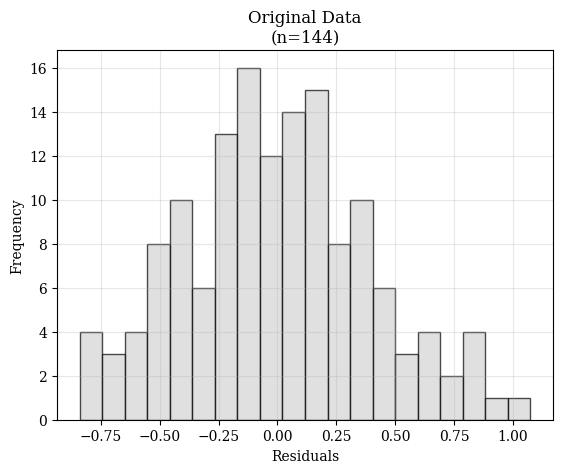

In [15]:
plt.hist(residuals, bins=20, alpha=0.7, color='lightgray', edgecolor='black')
plt.title(f'Original Data\n(n={len(residuals)})')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
# plt.savefig("measurement_data.png")

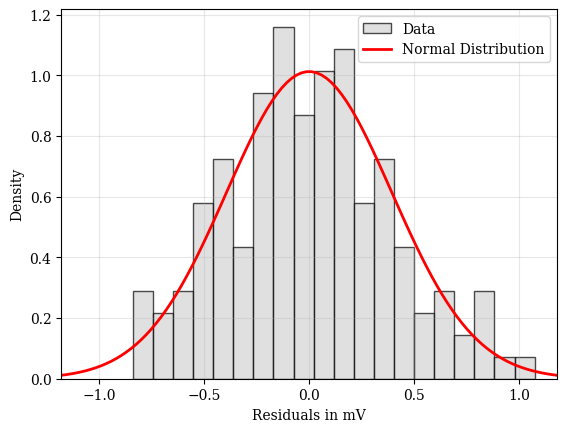

In [16]:
plt.hist(sorted_residuals, bins=20, density=True, alpha=0.7, color='lightgray', edgecolor='black', label='Data')
x_norm = np.linspace(-sorted_residuals.max()*1.1, sorted_residuals.max()*1.1, 100)
plt.plot(x_norm, stats.norm.pdf(x_norm, mean_filtered, std_filtered), 'r-', linewidth=2, label='Normal Distribution')
# plt.title('Density Plot (4 removed)')
plt.xlim((-sorted_residuals.max()*1.1, sorted_residuals.max()*1.1))
plt.xlabel('Residuals in mV')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
# plt.savefig("density_plot.png")